In [32]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.datasets import load_iris
from sklearn import tree

In [33]:
congestion = pd.read_excel("python_daya.xlsx")

In [34]:
loan_data = pd.read_csv("loandata.csv")
loan_data


,field,selectiveCollege,sex,Default,loanAmount,graduationYear
0,BUSINESS,0,Male,No,59265,2012
1,STEM,0,Female,No,74496,2011
2,STEM,0,Male,No,36667,2006
3,BUSINESS,0,Male,No,40551,2007
4,BUSINESS,1,Male,No,38566,2014
...,...,...,...,...,...,...
2015,HUMANITIES,1,Female,Yes,40396,2009
2016,STEM,0,Female,No,38055,2012
2017,STEM,0,Male,No,28557,2009
2018,HUMANITIES,0,Male,Yes,39013,2010


### Cleaning



In [35]:
clean_1 = pd.get_dummies(loan_data)
clean_1
cleaned = clean_1[clean_1.columns.drop(['field_HUMANITIES', 'sex_Male', 'Default_No'])]
cleaned


,selectiveCollege,loanAmount,graduationYear,field_BUSINESS,field_STEM,sex_Female,Default_Yes
0,0,59265,2012,1,0,0,0
1,0,74496,2011,0,1,1,0
2,0,36667,2006,0,1,0,0
3,0,40551,2007,1,0,0,0
4,1,38566,2014,1,0,0,0
...,...,...,...,...,...,...,...
2015,1,40396,2009,0,0,1,1
2016,0,38055,2012,0,1,1,0
2017,0,28557,2009,0,1,0,0
2018,0,39013,2010,0,0,0,1


### 3. Shuffle + split




In [36]:
df_shuffled = cleaned.sample(frac=1, random_state=42)   # seed is 42 for our GROUP NUMBER

training = df_shuffled.iloc[0:1010]
validation = df_shuffled.iloc[1011:1617]
test = df_shuffled.iloc[1618:]
training

,selectiveCollege,loanAmount,graduationYear,field_BUSINESS,field_STEM,sex_Female,Default_Yes
529,0,39949,2009,0,1,0,0
494,0,35779,2011,0,1,1,0
394,0,63575,2010,0,1,1,0
1864,0,51766,2014,0,1,0,0
1490,1,41640,2015,1,0,1,1
...,...,...,...,...,...,...,...
1487,1,48786,2015,0,1,0,0
25,0,34265,2019,1,0,0,1
1877,1,65333,2009,0,0,1,0
714,0,30951,2012,0,1,0,0


In [37]:
training_x = training.iloc[:,0:6]
training_y = training.iloc[:,6:]

val_x = validation.iloc[:,0:6]
val_y = validation.iloc[:,6:]
training_x["loanAmount"].sum()

49417184

## Q4. Baseline


In [47]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(training_x, training_y)
pred_y_val = dummy_clf.predict(val_x)
y_val_benchmark = accuracy_score(val_y, pred_y_val)
print('Benchmark accuracy score:', round(y_val_benchmark,4))

Benchmark accuracy score: 0.7624


Using the dummyclassifier we can deduct the benchmark accuracy score 

The score of 0.7624 is a benchmark accuracy score for a dummy classifier, a type of classifier that uses simple rules to predict class labels without considering the trends in the training data. The dummy classifier is used as a baseline for comparison with other classifiers and is particularly useful for imbalanced datasets. The most frequent strategy is used to predict the class label, which always returns the most frequent class label in the training data.

In [31]:
tree_1 = DecisionTreeClassifier(max_depth=7)   # max depth instead 
tree_1.fit(training_x,training_y)



predicted_training_y = tree_1.predict(training_x)
print(round(accuracy_score(training_y, predicted_training_y),3))

predicted_val_y = tree_1.predict(val_x)
print(round(accuracy_score(val_y, predicted_val_y),3))



0.922
0.837


In [24]:
for i in range(2,20):
    tree_1 = DecisionTreeClassifier(max_depth=i)
    tree_1.fit(training_x,training_y)



    predicted_training_y = tree_1.predict(training_x)
    print(round(accuracy_score(training_y, predicted_training_y),3), "---- max max_depth:",i)

    predicted_val_y = tree_1.predict(val_x)
    print(round(accuracy_score(val_y, predicted_val_y),3))



0.841 ---- max max_depth: 2
0.814
0.871 ---- max max_depth: 3
0.856
0.872 ---- max max_depth: 4
0.856
0.894 ---- max max_depth: 5
0.83
0.909 ---- max max_depth: 6
0.832
0.921 ---- max max_depth: 7
0.842
0.942 ---- max max_depth: 8
0.823
0.953 ---- max max_depth: 9
0.828
0.964 ---- max max_depth: 10
0.833
0.979 ---- max max_depth: 11
0.815
0.985 ---- max max_depth: 12
0.812
0.994 ---- max max_depth: 13
0.815
0.995 ---- max max_depth: 14
0.823
0.999 ---- max max_depth: 15
0.82
0.999 ---- max max_depth: 16
0.817
1.0 ---- max max_depth: 17
0.823
1.0 ---- max max_depth: 18
0.823
1.0 ---- max max_depth: 19
0.828


#### Hard to judge, but 7 or 8 seems most suitable

## Question 6.


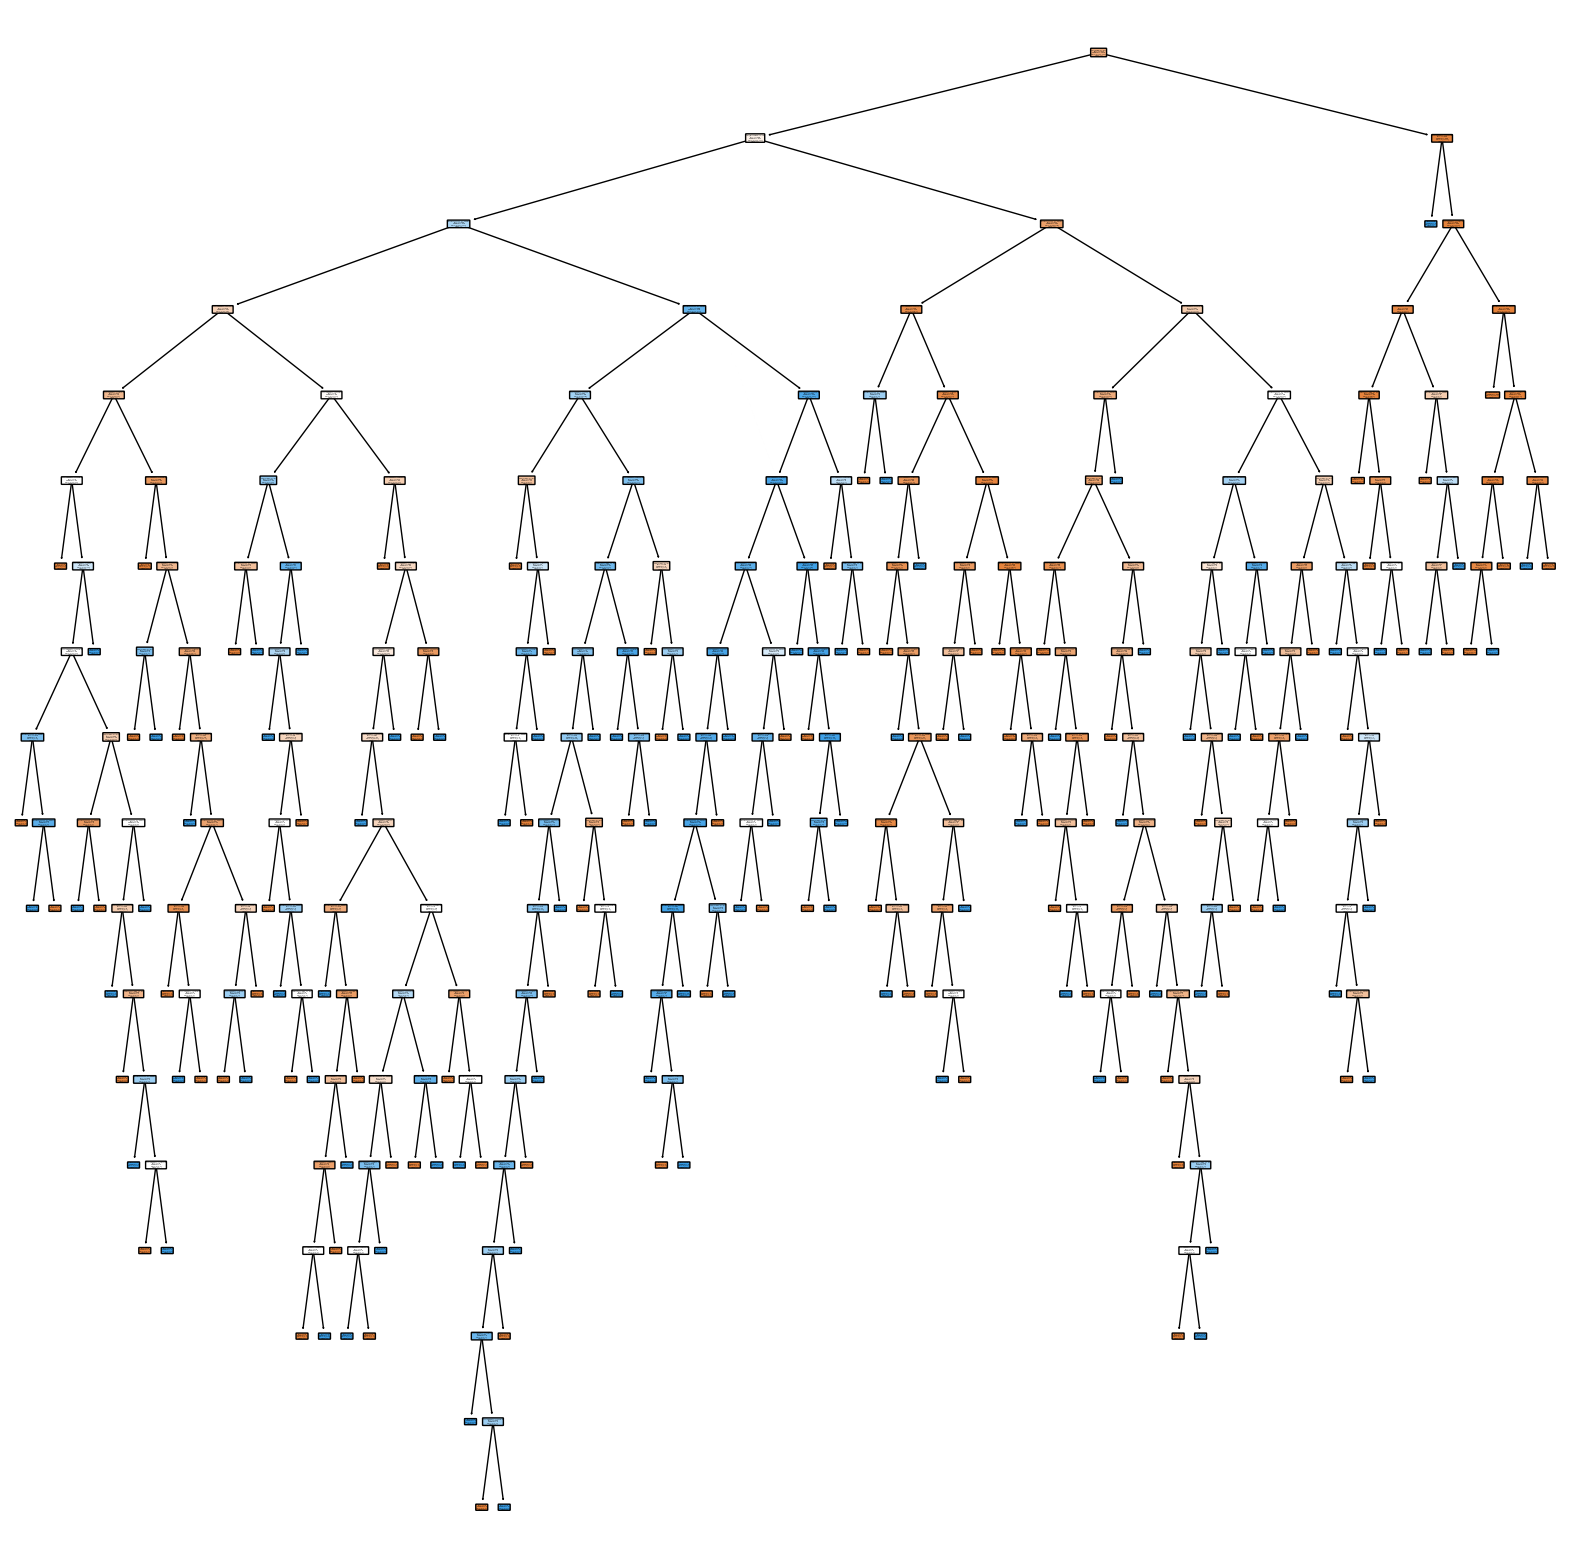

In [25]:
#Create the figure
plt.figure(figsize=(20,20))

#Create the tree plot
tree.plot_tree(tree_1,
           feature_names = list(training_x.columns), #Feature names
           class_names = ["0","1"], #Class names
           rounded = True,
           filled = True)

plt.show()


https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer

In [12]:
forrest_1 = RandomForestClassifier()
forrest_1.fit(training_x, training.Default_Yes )

train_forrest = {}
val_forrest = {}
accuracy = {}
time_dict = {} # timer

for i in range(1,50):
    forrest_1 = RandomForestClassifier(n_estimators=i, random_state=42)
    
    time_dict[i] = time.time() # timer
    
    forrest_1.fit(training_x, training.Default_Yes )
    
    
    
    predicted_training_y = forrest_1.predict(training_x)
    train_forrest[i]=round(accuracy_score(training_y, predicted_training_y),5)
    
    predicted_val_y = forrest_1.predict(val_x)
    val_forrest[i]=round(accuracy_score(val_y, predicted_val_y),5)
    
    
    
    accuracy[i] = [round(accuracy_score(training_y, predicted_training_y),5),round(accuracy_score(val_y, predicted_val_y),5)]
    
    


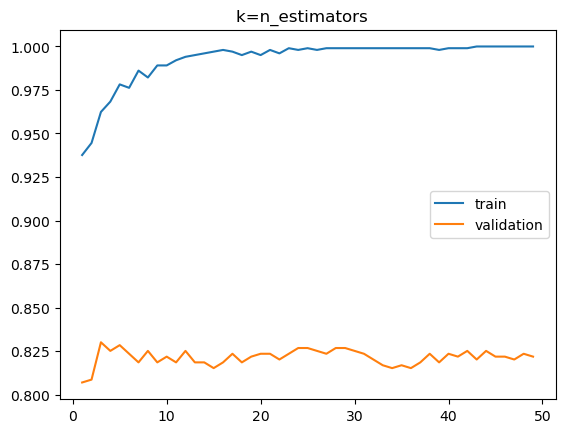

In [13]:
graph = pd.DataFrame(accuracy).transpose().rename(columns={0: "train", 1: "validation"})
graph.plot(title = 'k=n_estimators  ');

In [14]:
val_forrest

{1: 0.80693,
 2: 0.80858,
 3: 0.83003,
 4: 0.82508,
 5: 0.82838,
 6: 0.82343,
 7: 0.81848,
 8: 0.82508,
 9: 0.81848,
 10: 0.82178,
 11: 0.81848,
 12: 0.82508,
 13: 0.81848,
 14: 0.81848,
 15: 0.81518,
 16: 0.81848,
 17: 0.82343,
 18: 0.81848,
 19: 0.82178,
 20: 0.82343,
 21: 0.82343,
 22: 0.82013,
 23: 0.82343,
 24: 0.82673,
 25: 0.82673,
 26: 0.82508,
 27: 0.82343,
 28: 0.82673,
 29: 0.82673,
 30: 0.82508,
 31: 0.82343,
 32: 0.82013,
 33: 0.81683,
 34: 0.81518,
 35: 0.81683,
 36: 0.81518,
 37: 0.81848,
 38: 0.82343,
 39: 0.81848,
 40: 0.82343,
 41: 0.82178,
 42: 0.82508,
 43: 0.82013,
 44: 0.82508,
 45: 0.82178,
 46: 0.82178,
 47: 0.82013,
 48: 0.82343,
 49: 0.82178}

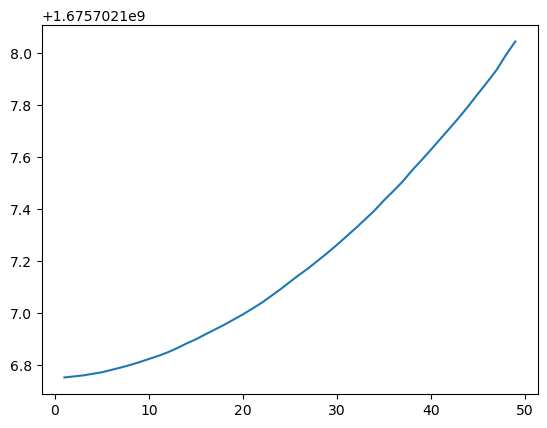

In [15]:
myList = time_dict.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.show()

#### Most efficient k numer seems to be 4, since it leads to the best results with one of the quickest timings.

## Question 8.


In [39]:
print('Benchmark accuracy score:', round(metrics.accuracy_score(y_val, y_pred),4))
print('Decision Tree accuracy score "max_depth=3":', 0.8597 )
print('Random Forrest accuracy score "max_depth=20+":', 0.8448 )

Benchmark accuracy score: 0.7607
Decision Tree accuracy score "max_depth=3": 0.8597
Random Forrest accuracy score "max_depth=20+": 0.8448


After the insepction of both Decision Tree and Random Forest Models we can see that the decision tree has a slightly better perfomance on the validation set with 86% and 84.5%, respectively.



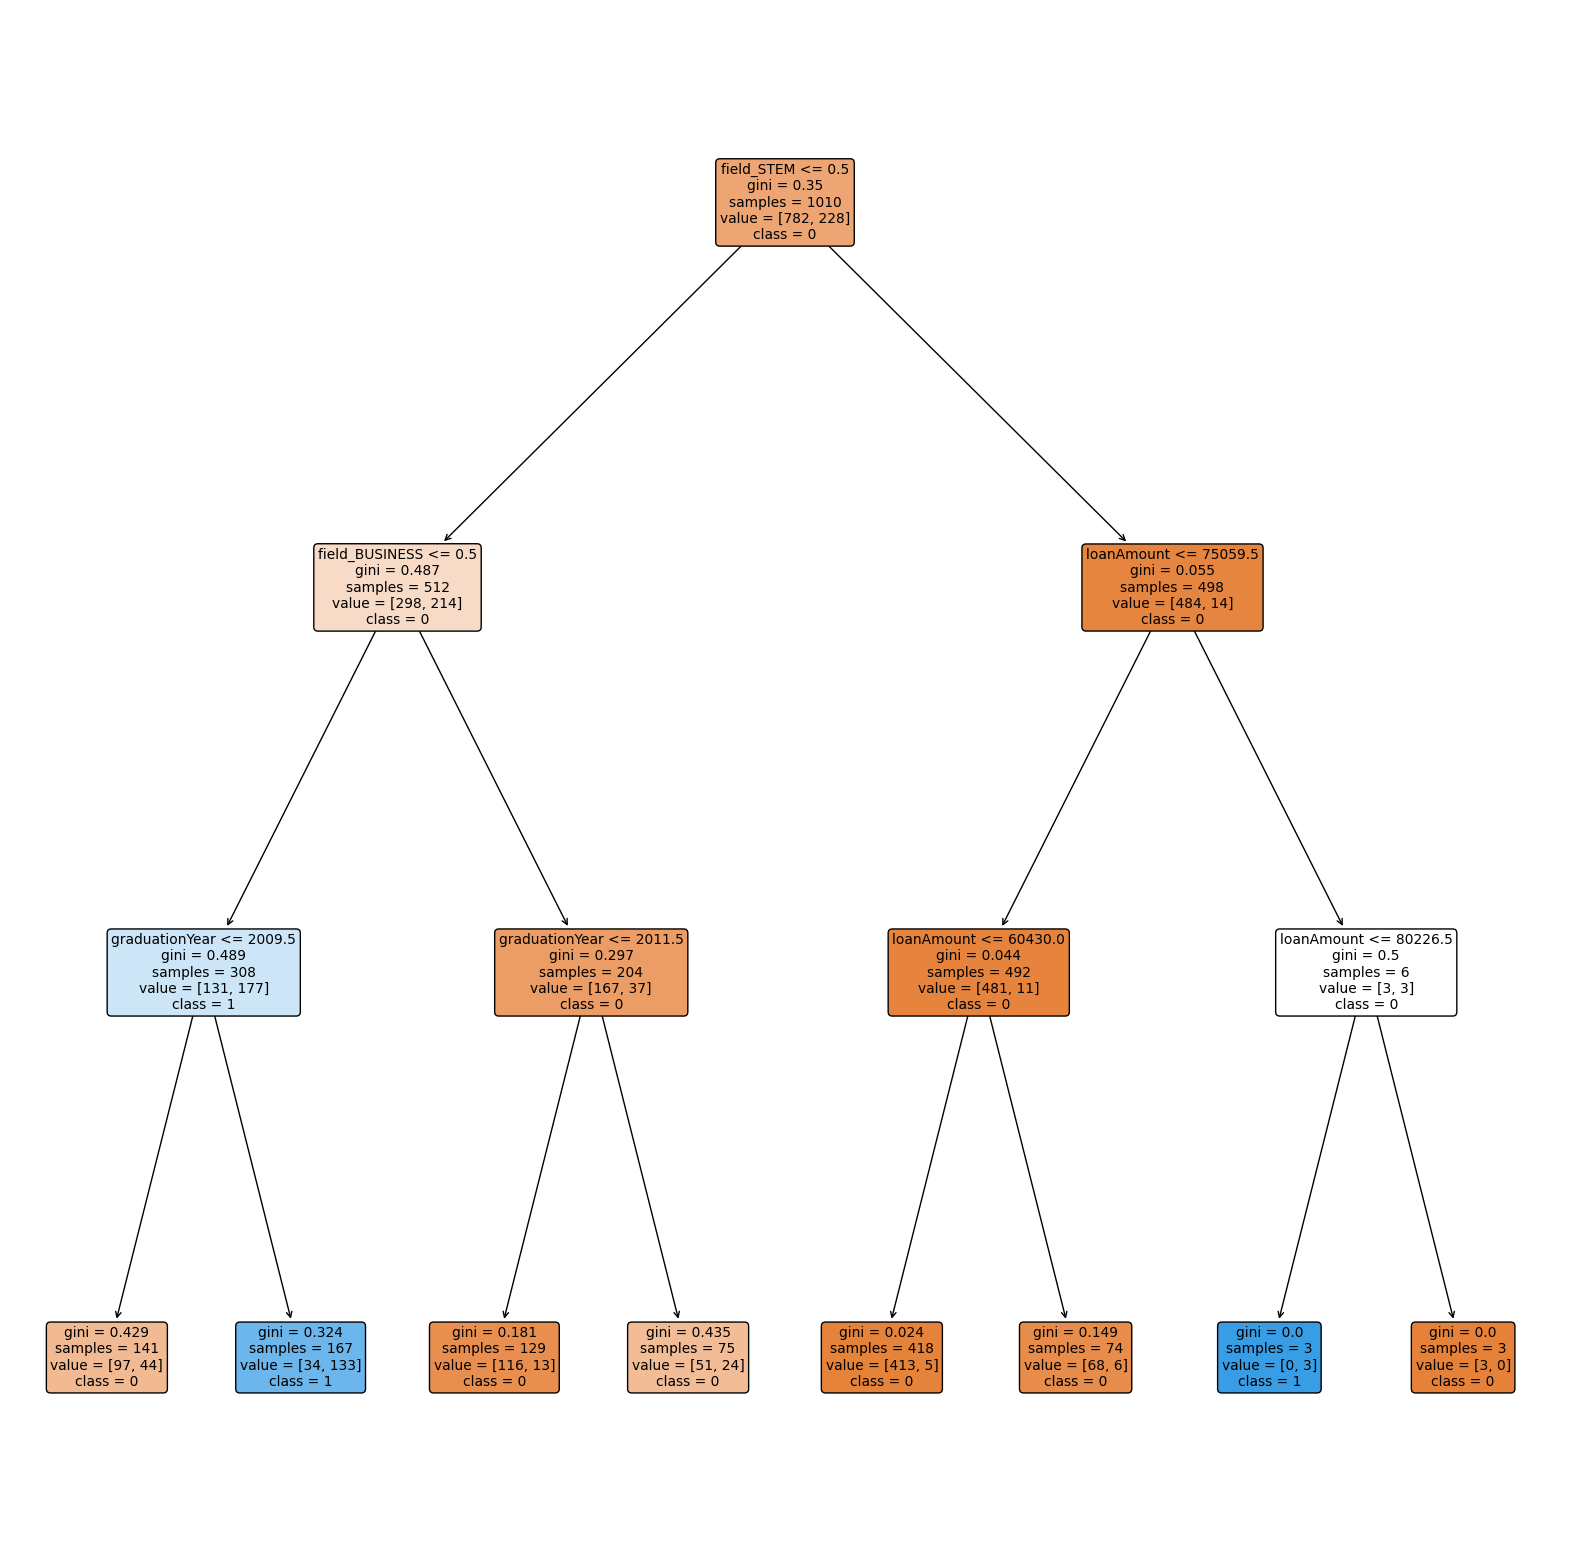

In [59]:
plt.figure(figsize=(20,20))

tree_1 = DecisionTreeClassifier(max_depth=3) 
tree_1.fit(x_train,y_train)
 
#Create the tree plot
tree.plot_tree(tree_1,
           feature_names = list(x_train.columns), #Feature names
           class_names = ["0","1"], #Class names
           rounded = True,
           filled = True)

plt.show()

A single Decision tree is easy to interpret, since we can easily visualise it, similar to the graph above with max_depth=3, whereas a forest is not. This tree is easy to understand even if the person is not a machine learning expert. 
Random Forest model contains many trees and therefore explaining how they output the aggregated predictions is very hard, if not impossible.

For the training time, we have a clear winner, where the chosen Decision tree model takes around 2 miliseconds to reproduce, whereas is the fastets perfomring model in Random Forest took around 5 miliseconds. Furthermore, the chosen number of estimators = 20+ will lead to a training time of 20+ miliseconds which is nearly ten times more than the chosen Decision Tree model.

Considreing all the factors above, it seems that the chosen Decision Tree model is a clear winner with slightly better accuracy score, better computational perfoamnce and easier interpretability for non-expert people. We therefore suggest Decision Tree model. 